/tmp/ipykernel_1032927/539381129.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


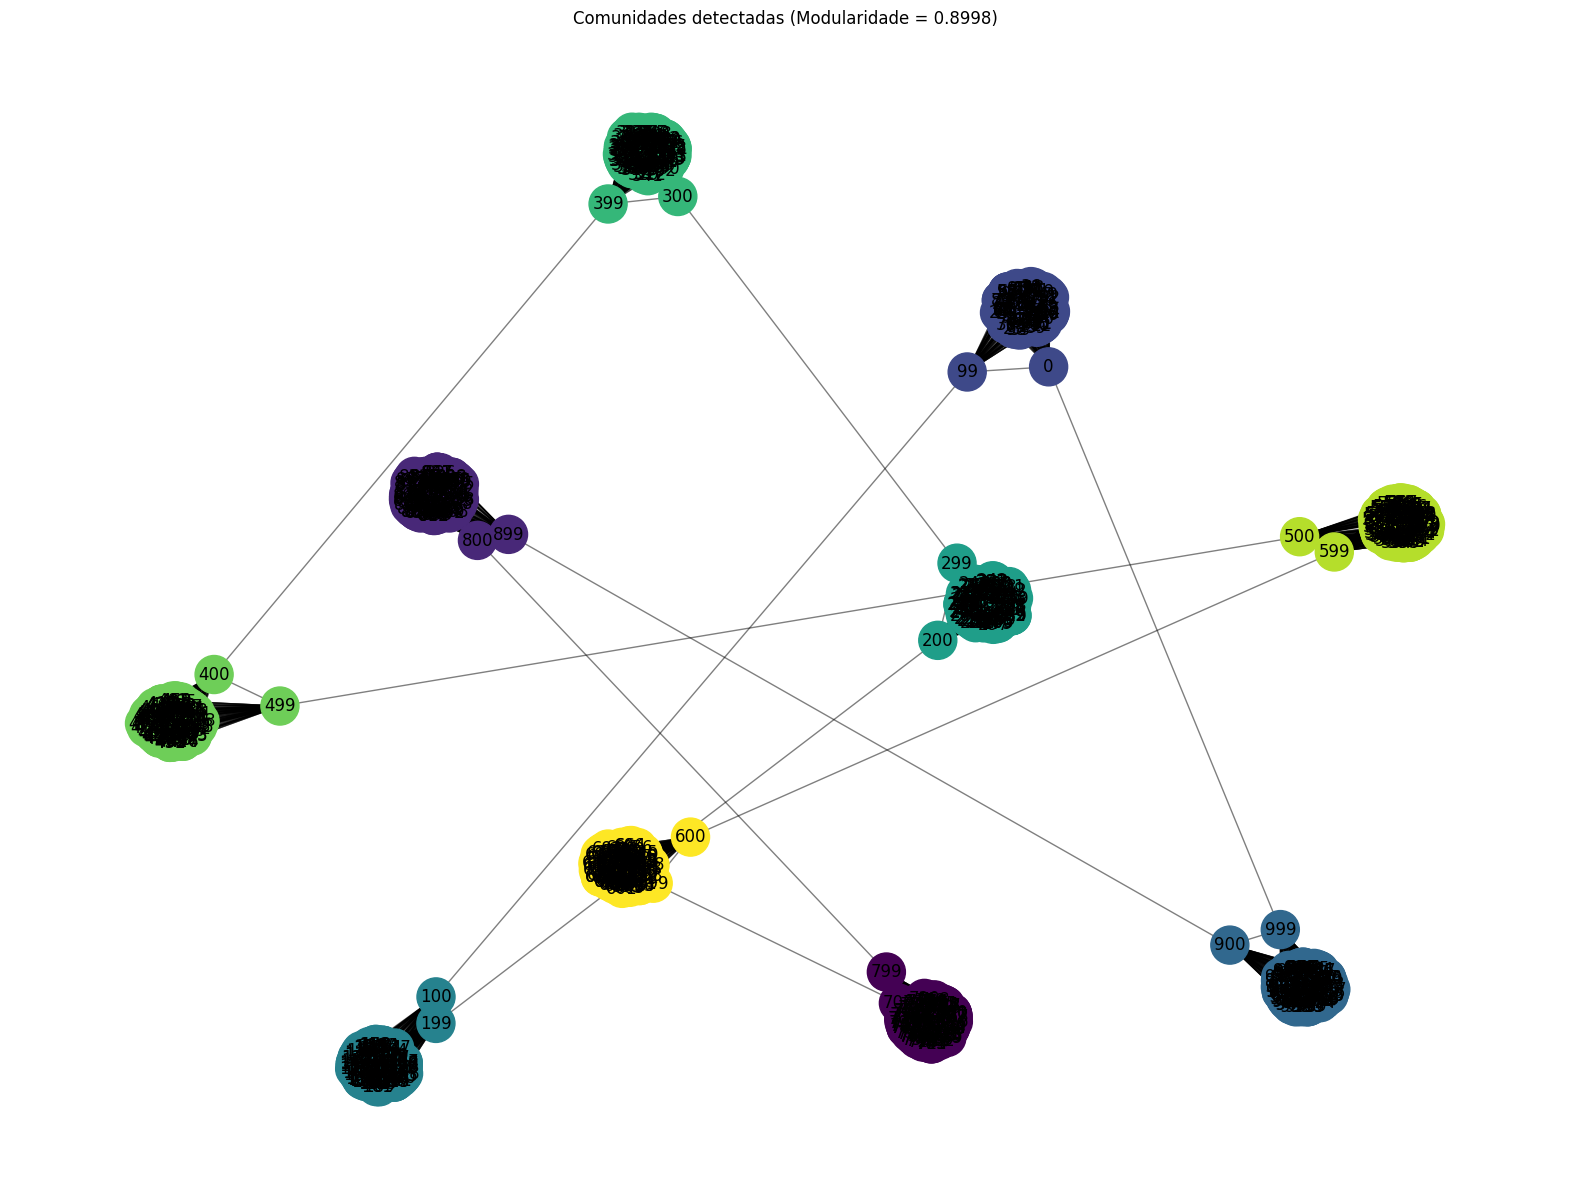

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  
import matplotlib.cm as cm

G = nx.Graph()
with open("./caveman_graph/caveman_graph.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) >= 2:
            u, v = int(parts[0]), int(parts[1])
            G.add_edge(u, v)

partition = community_louvain.best_partition(G)

plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=42)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

nx.draw_networkx_nodes(G, pos, partition.keys(),
                       node_size=750,
                       cmap=cmap,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

modularity = community_louvain.modularity(partition, G)
plt.title(f"Comunidades detectadas (Modularidade = {modularity:.4f})")
plt.axis('off')
plt.show()